<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


-   Extract information from a given web site 
-   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.


In [24]:
#your code goes here
table = soup.find('table')

In [25]:
import pandas as pd

df = pd.DataFrame(columns=['Language', 'Avg_Salary'])
df.head()

,Language,Avg_Salary


In [26]:
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    lang = cols[1].getText() # store the value in column 3 as color_name
    salary = cols[3].getText() # store the value in column 4 as color_code
    df = df.append({'Language':lang, 'Avg_Salary':salary}, ignore_index=True)

In [27]:
df.head(10)

,Language,Avg_Salary
0,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"
6,C++,"$113,865"
7,C#,"$88,726"
8,PHP,"$84,727"
9,SQL,"$84,793"


Save the scrapped data into a file named _popular-languages.csv_


In [9]:
# your code goes here
# doesn't store properly, is it a IBM problem?
df.to_csv(r'C:\Users\leandro998\Downloads\popular-languages.csv')

In [10]:
# Check if file is stored in IBM cloud:
import csv
with open(r'C:\Users\leandro998\Downloads\popular-languages.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            print(f'\t{row[0]} Language {row[1]}, avg_salary {row[2]}.')
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are , Language, Avg_Salary
	0 Language Language, avg_salary Average Annual Salary.
	1 Language Python, avg_salary $114,383.
	2 Language Java, avg_salary $101,013.
	3 Language R, avg_salary $92,037.
	4 Language Javascript, avg_salary $110,981.
	5 Language Swift, avg_salary $130,801.
	6 Language C++, avg_salary $113,865.
	7 Language C#, avg_salary $88,726.
	8 Language PHP, avg_salary $84,727.
	9 Language SQL, avg_salary $84,793.
	10 Language Go, avg_salary $94,082.
Processed 12 lines.


In [45]:
# df.set_index('Language')
df1 = df.head(10)
df1 = df1.drop(0)
df1['Avg_Sal'] = df1.Avg_Salary.str.replace('$','')
df1['Avg_Sal'] = df1.Avg_Sal.str.replace(',','').astype(float)
df1 = df1.set_index('Language')
df1 = df1.sort_values(by='Avg_Sal', ascending=False)
df1.head()
# df.plot(kind='bar')

,Avg_Salary,Avg_Sal
Language,,
Swift,"$130,801",130801.0
Python,"$114,383",114383.0
C++,"$113,865",113865.0
Javascript,"$110,981",110981.0
Java,"$101,013",101013.0


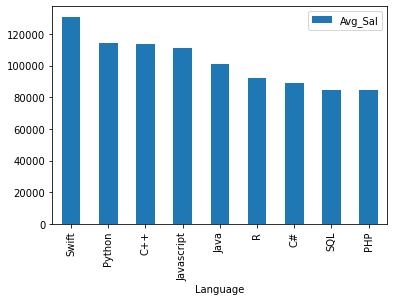

In [46]:
df1.plot(kind='bar')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
